## Моделирование NVE ансамбля

   - Система: $686$ равномерно распределенных частиц в кубике $12.25\times12.25\times12.25$;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 1.5~\varepsilon / k_B$;
   - Ансамбль: $NVE$;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $10000$;
   - Равновесные характеристики системы рассчитывалась через каждые $10000$ шагов;
   - Число ансамблей $N=3000$;
   - Подсчёт состоял из $2N+499$ шагов: $500$ на уравновешивание системы при фиксированной температуре и $2N-1$ на усреднение по ансамблям (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2021-05-04_nve_after_fcc'
PLOT_FILENAME_POSTFIX = 'nve_after_fcc'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, CURRENT_DATA)
PATH_TO_CURRENT_DATA

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2021-05-04_nve_after_fcc'

In [5]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, CURRENT_DATA)
PATH_TO_CURRENT_PLOTS

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\plots\\2021-05-04_nve_after_fcc'

#### Параметры системы, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [6]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        setups.append(setup)
        
setups

[{'temperature': 1.49962, 'pressure': -0.00408, 'heating_velocity': None},
 {'temperature': 1.56756, 'pressure': 0.44655, 'heating_velocity': None}]

#### Инициализация объекта для обработки данных и вывод таблицы значений функции радиального распределения

In [7]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.rdf.data

,radius,setup_0,setup_1
0,0.01,0.000000,0.000000
1,0.02,0.000000,0.000000
2,0.03,0.000000,0.000000
3,0.04,0.000000,0.000000
4,0.05,0.000000,0.000000
...,...,...,...
607,6.08,0.999513,0.999764
608,6.09,0.999910,1.001124
609,6.10,0.999705,1.000408
610,6.11,0.998636,1.000660


#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

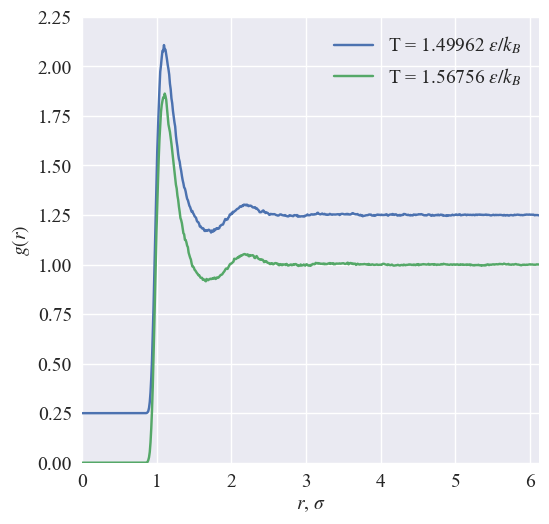

In [8]:
pp.plot_rdf(
    shift=0.25,
    left=0,
    right=6.125,
    bottom=0, 
    top=2.25,
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

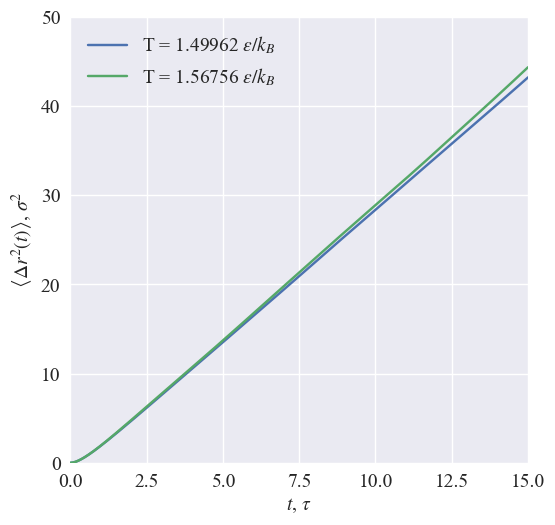

In [9]:
pp.plot_msd(
    left=0,
    right=15,
    bottom=0, 
    top=50,
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

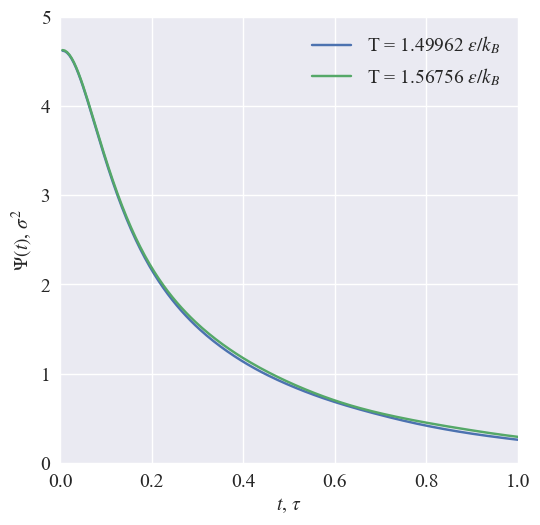

In [10]:
pp.plot_vaf(
    left=0,
    right=1,
    bottom=0, 
    top=5,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

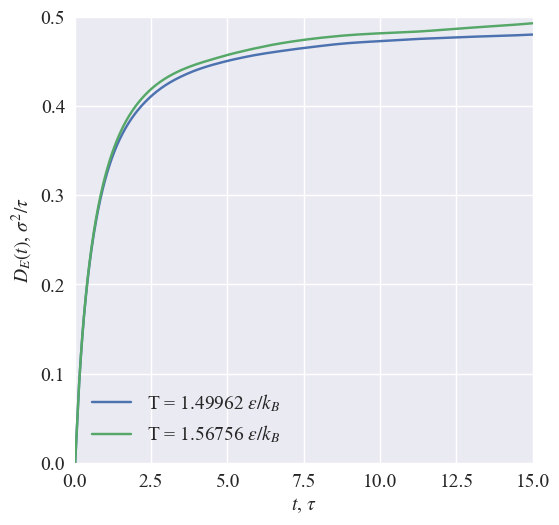

In [11]:
pp.plot_einstein_diffusion(
    left=0,
    right=15,
    bottom=0, 
    top=0.5,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

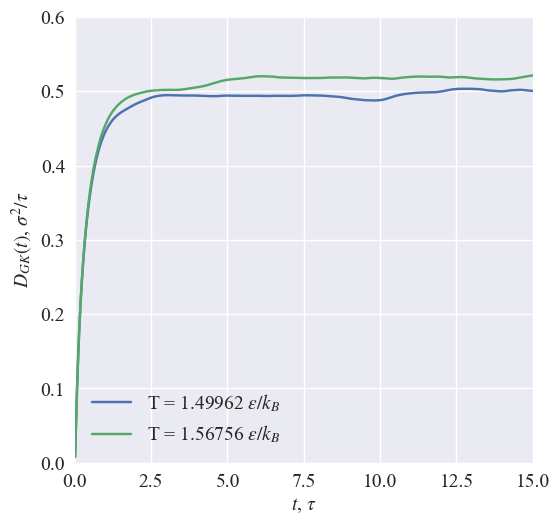

In [12]:
pp.plot_gk_diffusion(
    left=0,
    right=15,
    bottom=0, 
    top=0.6,
)

#### Температурная зависимость коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна

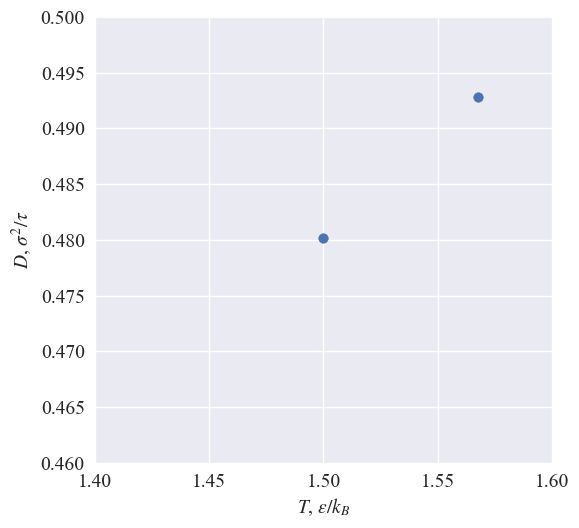

In [13]:
pp.plot_diffusion(
    left=1.4,
    right=1.6,
    bottom=0.46, 
    top=0.50,
)

#### Таблица временных зависимостей характеристик системы

In [14]:
if 'time' not in pp.system_parameters.columns:
    pp.system_parameters['time'] = (pp.system_parameters.index + 1) * 0.005
pp.system_parameters

,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume,time
0,1.50000,-0.00408,1543.1075,-1394.2632,148.84436,-3108.71220,0.0,0.0,1838.2656,0.005
1,1.49927,-0.00023,1542.0773,-1393.2428,148.83447,-3085.43480,0.0,0.0,1838.2656,0.010
2,1.49800,0.00551,1540.4366,-1391.6140,148.82263,-3050.48200,0.0,0.0,1838.2656,0.015
3,1.49608,0.01331,1538.0416,-1389.2375,148.80408,-3002.70200,0.0,0.0,1838.2656,0.020
4,1.49336,0.02316,1534.7220,-1385.9397,148.78235,-2941.73880,0.0,0.0,1838.2656,0.025
...,...,...,...,...,...,...,...,...,...,...
9995,1.57005,0.45116,1614.6130,-1465.6587,148.95435,-741.15210,0.0,0.0,1838.2656,49.980
9996,1.56967,0.44983,1614.0201,-1465.0427,148.97742,-747.30640,0.0,0.0,1838.2656,49.985
9997,1.56894,0.44884,1613.2712,-1464.2542,149.01709,-751.30396,0.0,0.0,1838.2656,49.990
9998,1.56826,0.44793,1612.8176,-1463.7834,149.03418,-755.40890,0.0,0.0,1838.2656,49.995


#### Зависимость объёма системы от времени

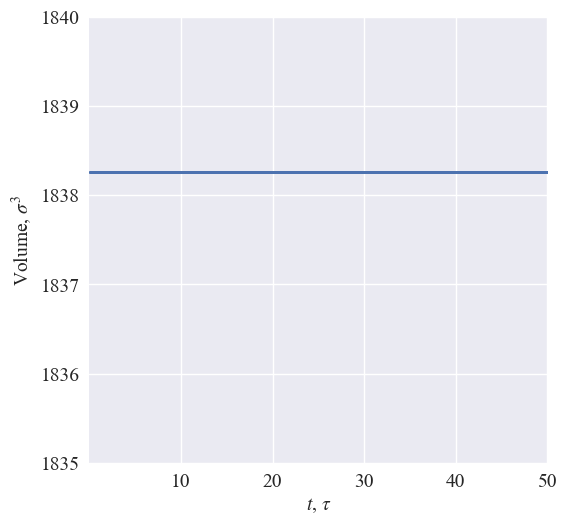

In [15]:
pp.plot_system_parameters(
    column_names=['volume',],
    y_label=r'Volume, $\sigma ^ 3$',
    bottom=1835,
    top=1840,
);

#### Зависимость температуры системы от времени

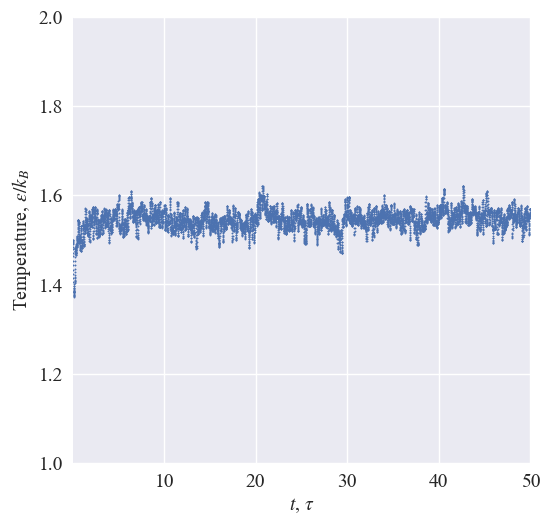

In [16]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
    bottom=1,
    top=2,
);

#### Зависимость давления системы от времени

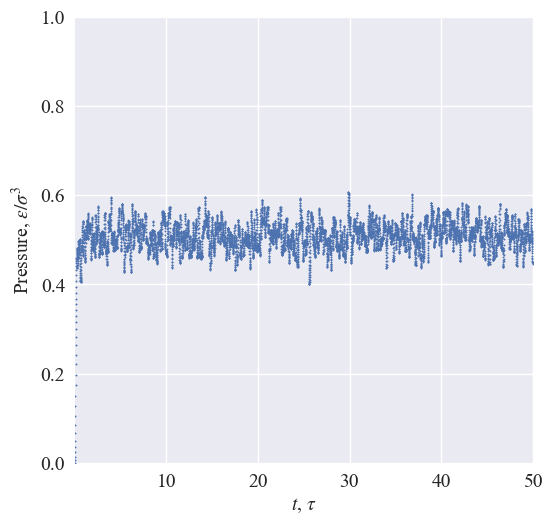

In [17]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
    bottom=0,
    top=1,
);

#### Зависимость кинетической, потенциальной  и полной (внутренней) энергии системы от времени

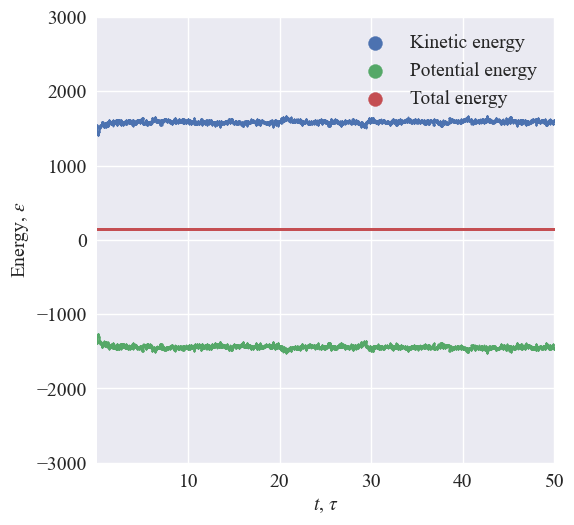

In [18]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
    bottom=-3000,
    top=3000,
    file_name_prefix='all_energies',
);

#### Вычисление термодинамических функций

In [19]:
pp.get_enthalpy();
pp.get_entropy();
pp.get_free_energy();
pp.get_gibbs_energy();

#### Зависимость энтропии системы от времени

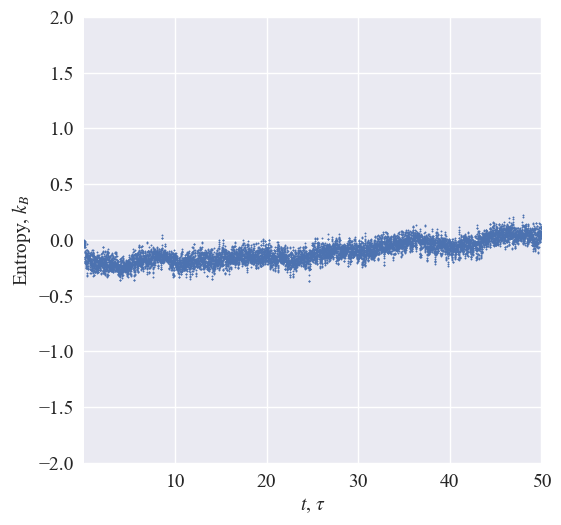

In [20]:
pp.plot_system_parameters(
    column_names=['entropy', ],
    y_label=r'Entropy, $k_B$',
    bottom=-2,
    top=2,
);

#### Зависимость энтальпии, внутренней энергии, свободной энергии Гельмгольца и энергии Гиббса от времени

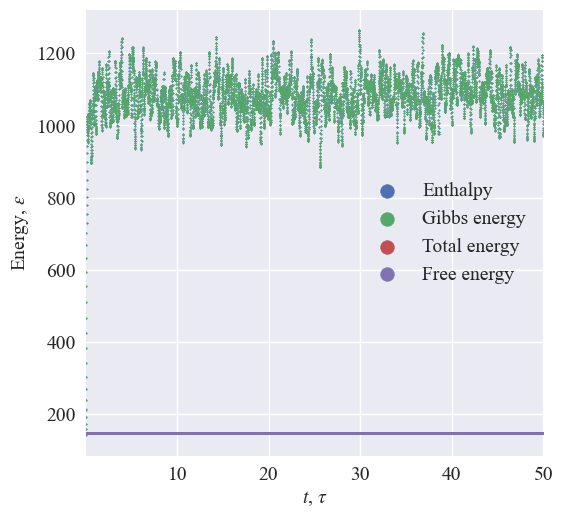

In [21]:
pp.plot_system_parameters(
    column_names=[
        'enthalpy', 
        'gibbs_energy', 
        'total_energy', 
        'free_energy',
    ],
    y_label=r'Energy, $\epsilon$',
    file_name_prefix='all_thermodynamic_functions',
#     bottom=100,
#     top=2000,
);

#### Зависимость внутренней энергии системы от энтропии

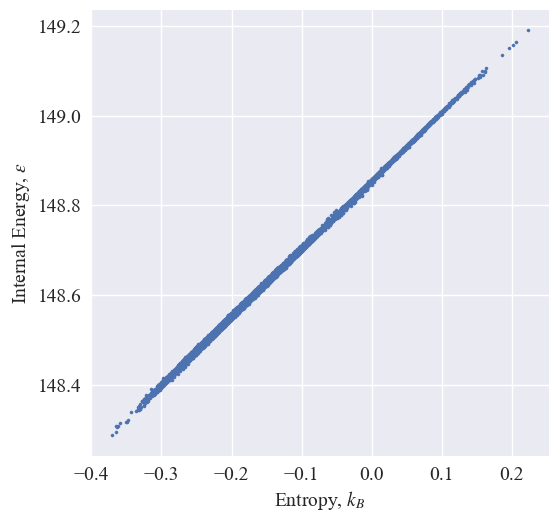

In [22]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['total_energy'], s=5);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость внутренней энергии системы от объёма

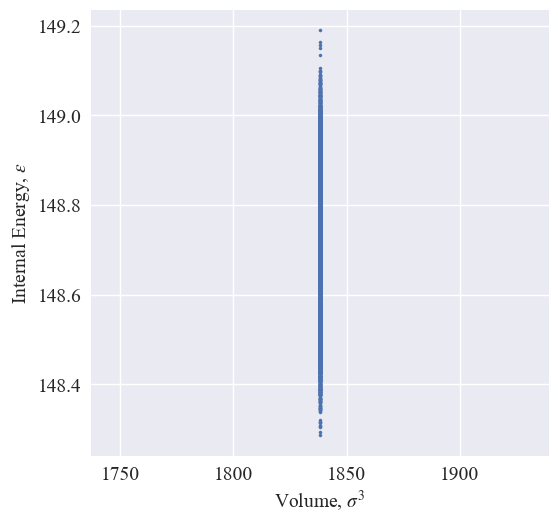

In [23]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['total_energy'], s=5);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от энтропии

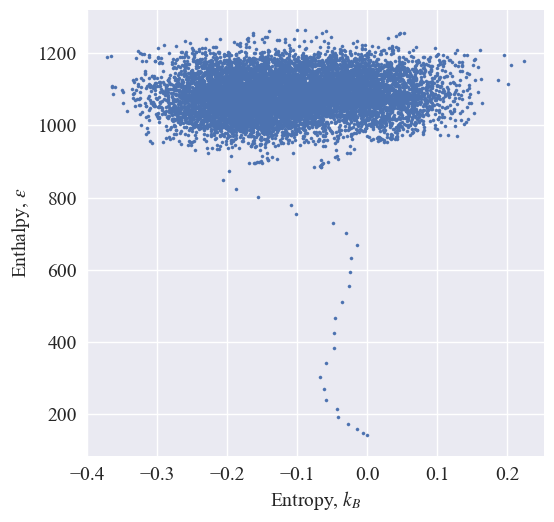

In [24]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['enthalpy'], s=5);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от давления

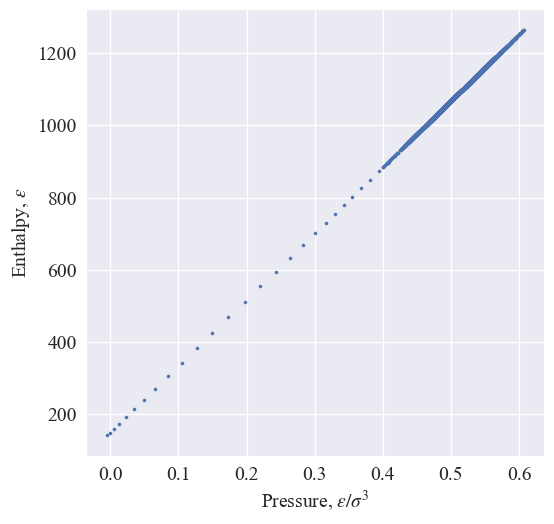

In [25]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['enthalpy'], s=5);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Enthalpy, $\epsilon$')
plt.show();

#### Зависимость свободной энергии Гельмгольца от объёма системы

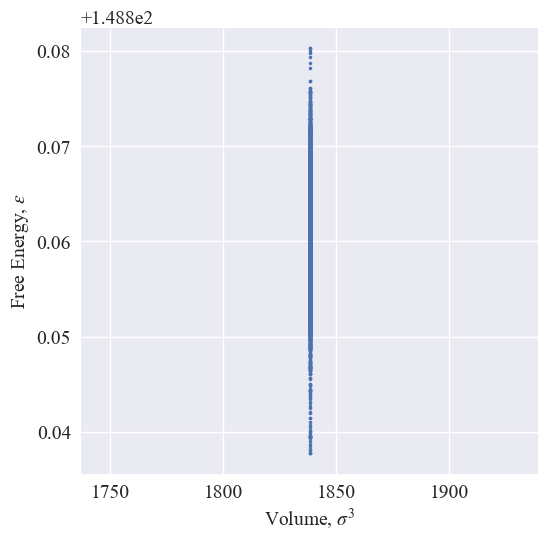

In [26]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['free_energy'], s=5);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость свободной энергии Гельмгольца от температуры системы

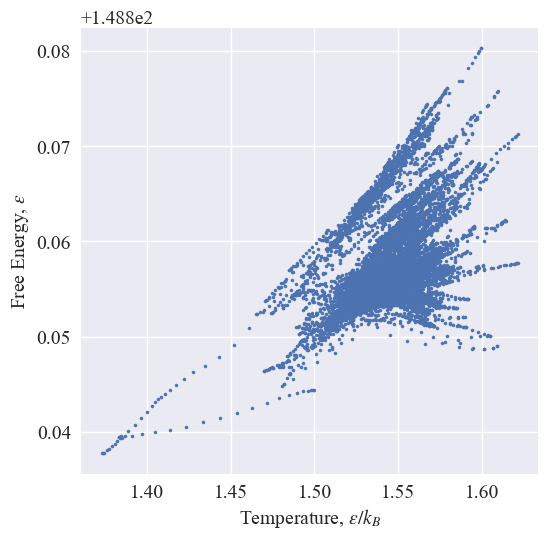

In [27]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['free_energy'], s=5);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от температуры системы

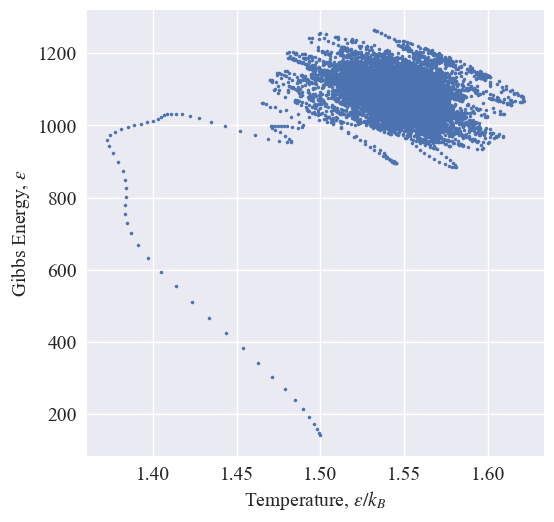

In [28]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['gibbs_energy'], s=5);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от давления системы

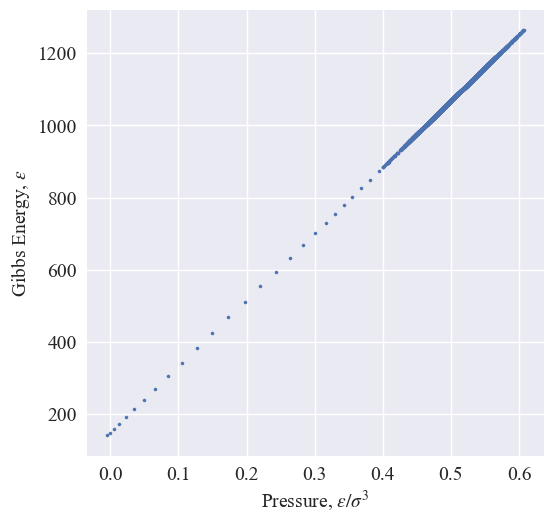

In [29]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['gibbs_energy'], s=5);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();